In [1]:
import requests
import boto3

import numpy as np
import pandas as pd
from io import StringIO

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [7]:
def data_preprocessing(response, file_name, bucket):
     
    data = response.json()
    df = pd.json_normalize(data)
    df.to_csv(file_name, index=False)
    upload_data(file_name, bucket)

In [8]:
def upload_data(file_name, bucket):
    
    client_s3 = boto3.client('s3')
    client_s3.upload_file('./' + file_name, bucket, file_name)

In [9]:
def read_data(file, bucket):
    
    s3 = boto3.resource('s3')
    object_s3 = s3.Bucket(bucket).Object(file).get()
    data = object_s3['Body'].read().decode()
    df = pd.read_csv(StringIO(data))
    return df

In [10]:
def plot_data(df1, df2, image_name):
    
    plt.plot(df1['exchangedate'], df1['rate'], label='EUR')
    plt.plot(df2['exchangedate'], df2['rate'], label='USD')
    
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
    plt.gcf().autofmt_xdate()
    plt.xlabel('2021')
    plt.ylabel('rate')
    plt.legend()
    plt.savefig(image_name)
    plt.show()
    
    upload_data(image_name, 'bucket-for-lab2')

In [11]:
euro = 'https://bank.gov.ua/NBU_Exchange/exchange_site?start=20210101&end=20211231&valcode=eur&sort=exchangedate&order=asc&json'
usd = 'https://bank.gov.ua/NBU_Exchange/exchange_site?start=20210101&end=20211231&valcode=usd&sort=exchangedate&order=asc&json'
bucket = 'bucket-for-lab2'

resp_euro = requests.get(euro)
resp_usd = requests.get(usd)

data_preprocessing(resp_euro, 'euro.csv', bucket)
data_preprocessing(resp_usd, 'usd.csv', bucket)

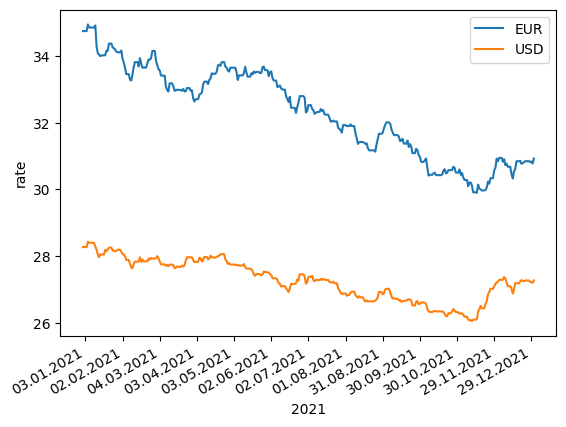

In [12]:
df_eur = read_data('euro.csv', bucket)
df_usd = read_data('usd.csv', bucket)

plot_data(df_eur, df_usd, 'Exchange_Rates.png')